In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving financial_loan.csv to financial_loan.csv


In [24]:
df=pd.read_csv('financial_loan.csv')

In [23]:
df.head(10)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
5,1062608,CA,INDIVIDUAL,3 years,Studio 94 Corp,C,RENT,17-07-2021,16-03-2021,12-08-2021,...,C3,36 months,Not Verified,28000.0,0.1260,275.96,0.1465,8000,11,8637
6,1067441,TX,INDIVIDUAL,10+ years,American Airlines,C,MORTGAGE,19-11-2021,14-06-2021,13-12-2021,...,C2,36 months,Verified,94800.0,0.2453,205.86,0.1427,6000,30,7218
7,1066424,PA,INDIVIDUAL,10+ years,SCI Mahanoy,A,OWN,11-06-2021,14-07-2021,14-07-2021,...,A4,36 months,Source Verified,59000.0,0.0665,172.10,0.0790,5500,23,6172
8,1065254,FL,INDIVIDUAL,10+ years,Tech Data Corp,A,MORTGAGE,02-09-2021,15-06-2021,12-10-2021,...,A5,36 months,Verified,116400.0,0.0394,762.08,0.0890,24000,31,8650
9,1064589,MI,INDIVIDUAL,10+ years,teltow contracting,B,MORTGAGE,09-02-2021,16-03-2021,16-03-2021,...,B5,60 months,Not Verified,36000.0,0.1773,93.21,0.1269,4125,21,5551


In [28]:
df.duplicated(subset=['id']).any()

np.False_

In [29]:
df.isnull().any()

,0
id,False
address_state,False
application_type,False
emp_length,False
emp_title,True
grade,False
home_ownership,False
issue_date,False
last_credit_pull_date,False
last_payment_date,False


In [32]:
Total_funded_Amount =df['loan_amount'].sum()
print(Total_funded_Amount)

435757075


In [33]:
Total_Amount_Received =df['total_payment'].sum()
print(Total_Amount_Received)

473070933


In [35]:
Average_interest_rate=df['int_rate'].mean()
print(Average_interest_rate)

0.12048831397760265


In [36]:
Average_Dti=df['dti'].mean()
print(Average_Dti)

0.13327433119037743


In [43]:
Application_by_lenght=df.groupby('emp_length')['id'].count ().sort_values(ascending=True)
print(Application_by_lenght)

emp_length
9 years      1255
8 years      1476
7 years      1772
6 years      2228
1 year       3229
5 years      3273
4 years      3428
3 years      4088
2 years      4382
< 1 year     4575
10+ years    8870
Name: id, dtype: int64


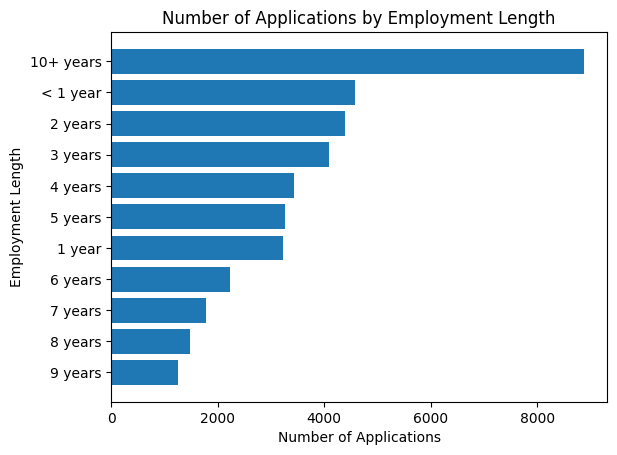

In [44]:
plt.barh(Application_by_lenght.index, Application_by_lenght.values)
plt.xlabel('Number of Applications')
plt.ylabel('Employment Length')
plt.title('Number of Applications by Employment Length')
plt.show()

In [46]:
total_applicationby_purpose=df.groupby('purpose')['id'].count ().sort_values(ascending=True).sort_values(ascending=True)
print(total_applicationby_purpose)

purpose
renewable_energy         94
educational             315
vacation                352
house                   366
moving                  559
medical                 667
wedding                 928
car                    1497
small business         1776
major purchase         2110
home improvement       2876
other                  3824
credit card            4998
Debt consolidation    18214
Name: id, dtype: int64


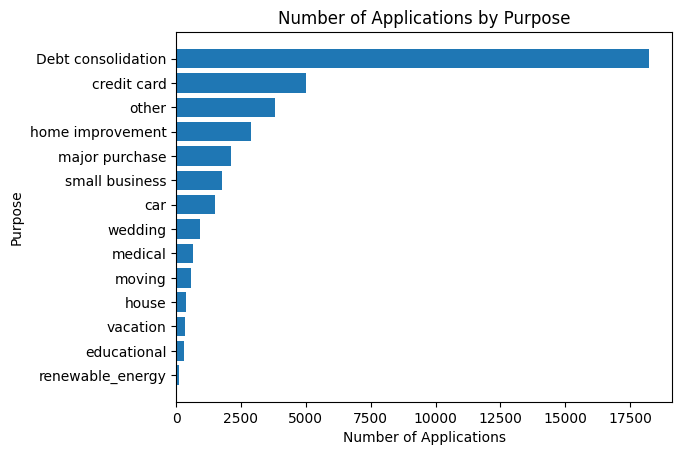

In [47]:
plt.barh(total_applicationby_purpose.index, total_applicationby_purpose.values)
plt.xlabel('Number of Applications')
plt.ylabel('Purpose')
plt.title('Number of Applications by Purpose')
plt.show()

In [48]:
total_applicationbyterm=df.groupby('term')['id'].count ().sort_values(ascending=True)
print(total_applicationbyterm)

term
60 months    10339
36 months    28237
Name: id, dtype: int64


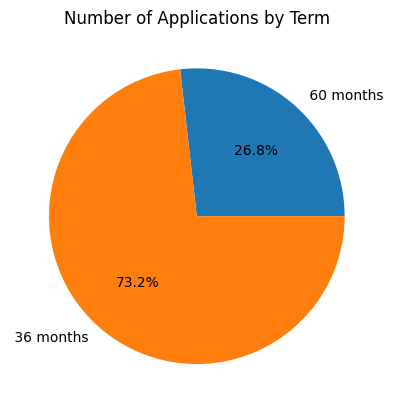

In [49]:
plt.pie(total_applicationbyterm.values, labels=total_applicationbyterm.index, autopct='%1.1f%%')
plt.title('Number of Applications by Term')
plt.show()

In [53]:
total_application_state=df.groupby('address_state')['id'].count ().sort_values(ascending=False).head(5)
print(total_application_state)

address_state
CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
Name: id, dtype: int64


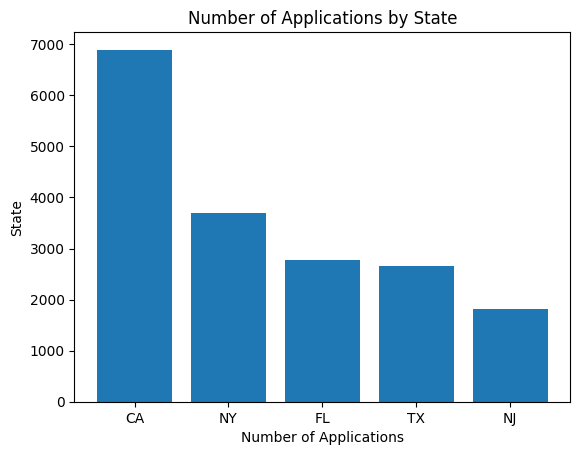

In [55]:
plt.bar(total_application_state.index, total_application_state.values)
plt.xlabel('Number of Applications')
plt.ylabel('State')
plt.title('Number of Applications by State')
plt.show()

In [60]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y')
Total_loan_application_month = df.groupby(df['issue_date'].dt.to_period('M'))['id'].count().sort_values(ascending=True)
print(Total_loan_application_month)

issue_date
2021-02    2279
2021-01    2332
2021-03    2627
2021-04    2755
2021-05    2911
2021-06    3184
2021-07    3366
2021-08    3441
2021-09    3536
2021-10    3796
2021-11    4035
2021-12    4314
Freq: M, Name: id, dtype: int64


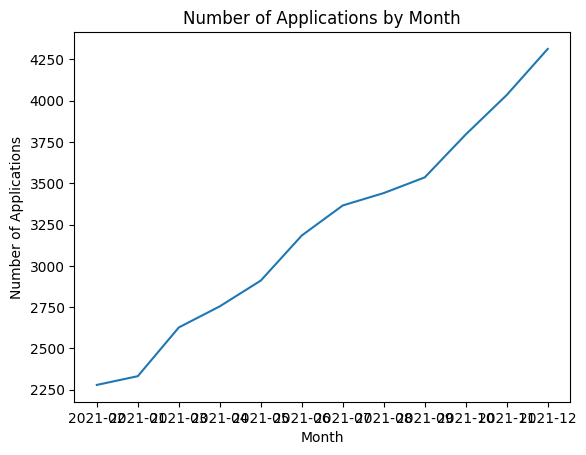

In [58]:
plt.plot(Total_loan_application_month.index.astype(str), Total_loan_application_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.title('Number of Applications by Month')
plt.show()